In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,plot_roc_curve

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


### Loaded Data from drive
## Sice data is very large we only used 10% of data

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amit.csv")
df = df.sample(frac = 0.6)
print(df.shape)

(16128, 57)


In [ ]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,...,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
16775,17,76.035355,1.978037,3.701237,2.553593,13.809744,0.070858,3.320358,18.766386,-1.375277,...,4576.341458,297.969872,22989.912949,2.457258e+05,16731.134486,1.013081e+06,6.05,8.08,9.00,4.95
13455,15,-119.978165,1.940916,1.593933,3.402177,21.877403,-0.045310,4.555732,24.853120,-1.470240,...,17570.324554,168.104276,390495.917168,9.699719e+05,9291.309612,2.042323e+07,7.97,7.90,6.21,8.86
20892,18,22.048094,1.985677,2.135704,3.770362,14.889051,0.032814,4.427721,20.844029,-1.008434,...,15143.577522,694.544590,138803.945711,1.163275e+05,15628.895603,7.897487e+05,3.18,5.04,5.65,3.15
19410,6,0.850067,1.997740,5.643057,5.200022,33.975127,-0.019997,7.616170,68.492888,-1.578069,...,36509.021385,275.273441,213527.104582,8.475772e+06,20047.951693,5.164860e+07,5.04,3.00,3.65,5.04
15856,1,773.235829,1.989158,2.264813,7.821330,46.728474,-0.042747,9.270289,59.742752,-1.195408,...,103714.575022,1288.492162,978631.234271,1.490474e+06,44758.690220,1.353186e+07,3.08,2.96,1.92,1.88


## Removing the infinite values from the dataset

In [6]:
df.shape

(16128, 57)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,...,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
16775,17,76.035355,1.978037,3.701237,2.553593,13.809744,0.070858,3.320358,18.766386,-1.375277,...,4576.341458,297.969872,22989.912949,2.457258e+05,16731.134486,1.013081e+06,6.05,8.08,9.00,4.95
13455,15,-119.978165,1.940916,1.593933,3.402177,21.877403,-0.045310,4.555732,24.853120,-1.470240,...,17570.324554,168.104276,390495.917168,9.699719e+05,9291.309612,2.042323e+07,7.97,7.90,6.21,8.86
20892,18,22.048094,1.985677,2.135704,3.770362,14.889051,0.032814,4.427721,20.844029,-1.008434,...,15143.577522,694.544590,138803.945711,1.163275e+05,15628.895603,7.897487e+05,3.18,5.04,5.65,3.15
19410,6,0.850067,1.997740,5.643057,5.200022,33.975127,-0.019997,7.616170,68.492888,-1.578069,...,36509.021385,275.273441,213527.104582,8.475772e+06,20047.951693,5.164860e+07,5.04,3.00,3.65,5.04
15856,1,773.235829,1.989158,2.264813,7.821330,46.728474,-0.042747,9.270289,59.742752,-1.195408,...,103714.575022,1288.492162,978631.234271,1.490474e+06,44758.690220,1.353186e+07,3.08,2.96,1.92,1.88


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["coeff_var"], how="all")
df.shape

(15686, 57)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['dominance']

16775    9.00
13455    6.21
20892    5.65
19410    3.65
15856    1.92
         ... 
18827    9.00
9982     8.26
22709    7.08
12144    7.08
25032    5.94
Name: dominance, Length: 15686, dtype: float64

# Changing the output labels to Categorical type

### We have divided into only into two classes with a threshold of 4.5.
### We can divide into thress classes or change threshold , could be our hyperparameter and we can tune to get better results

In [ ]:
df['dominance'] = np.where(df['dominance']<=4.50 , 0, df['dominance'])
df['dominance'] = np.where(df['dominance']>4.50 , 1, df['dominance'])
df['valence'] = np.where(df['valence']<=4.50 , 0, df['valence'])
df['valence'] = np.where(df['valence']>4.50 , 1, df['valence'])
df['arousal'] = np.where(df['arousal']<=4.50 , 0, df['arousal'])
df['arousal'] = np.where(df['arousal']>4.50 , 1, df['arousal'])
df['liking'] = np.where(df['liking']<=4.50 , 0, df['liking'])
df['liking'] = np.where(df['liking']>4.50 , 1, df['liking'])


In [ ]:
df['dominance'].unique()

array([0., 1.])

In [ ]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,...,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
16775,17,76.035355,1.978037,3.701237,2.553593,13.809744,0.070858,3.320358,18.766386,-1.375277,...,4576.341458,297.969872,22989.912949,2.457258e+05,16731.134486,1.013081e+06,1.0,1.0,1.0,1.0
13455,15,-119.978165,1.940916,1.593933,3.402177,21.877403,-0.045310,4.555732,24.853120,-1.470240,...,17570.324554,168.104276,390495.917168,9.699719e+05,9291.309612,2.042323e+07,1.0,1.0,1.0,1.0
20892,18,22.048094,1.985677,2.135704,3.770362,14.889051,0.032814,4.427721,20.844029,-1.008434,...,15143.577522,694.544590,138803.945711,1.163275e+05,15628.895603,7.897487e+05,0.0,1.0,1.0,0.0
19410,6,0.850067,1.997740,5.643057,5.200022,33.975127,-0.019997,7.616170,68.492888,-1.578069,...,36509.021385,275.273441,213527.104582,8.475772e+06,20047.951693,5.164860e+07,1.0,0.0,0.0,1.0
15856,1,773.235829,1.989158,2.264813,7.821330,46.728474,-0.042747,9.270289,59.742752,-1.195408,...,103714.575022,1288.492162,978631.234271,1.490474e+06,44758.690220,1.353186e+07,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(15665, 57)

## Choosing our X and Y

In [ ]:
X = df.drop(['valence','liking','dominance','arousal'],axis = 1)
X.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,...,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
16775,17,76.035355,1.978037,3.701237,2.553593,13.809744,0.070858,3.320358,18.766386,-1.375277,...,5.184908,1395.243636,276.809170,5215.355638,4576.341458,297.969872,22989.912949,2.457258e+05,16731.134486,1.013081e+06
13455,15,-119.978165,1.940916,1.593933,3.402177,21.877403,-0.045310,4.555732,24.853120,-1.470240,...,17.596973,3441.126133,224.748331,60073.591787,17570.324554,168.104276,390495.917168,9.699719e+05,9291.309612,2.042323e+07
20892,18,22.048094,1.985677,2.135704,3.770362,14.889051,0.032814,4.427721,20.844029,-1.008434,...,11.238508,3550.714229,440.635554,24503.101489,15143.577522,694.544590,138803.945711,1.163275e+05,15628.895603,7.897487e+05
19410,6,0.850067,1.997740,5.643057,5.200022,33.975127,-0.019997,7.616170,68.492888,-1.578069,...,13.077283,6704.489954,279.974757,33177.143885,36509.021385,275.273441,213527.104582,8.475772e+06,20047.951693,5.164860e+07
15856,1,773.235829,1.989158,2.264813,7.821330,46.728474,-0.042747,9.270289,59.742752,-1.195408,...,25.504998,16058.365170,656.772074,126198.026114,103714.575022,1288.492162,978631.234271,1.490474e+06,44758.690220,1.353186e+07


In [ ]:
X = X.drop(['Unnamed: 0'],axis = 1)
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,...,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
16775,76.035355,1.978037,3.701237,2.553593,13.809744,0.070858,3.320358,18.766386,-1.375277,-1.622212,...,5.184908,1395.243636,276.809170,5215.355638,4576.341458,297.969872,22989.912949,2.457258e+05,16731.134486,1.013081e+06
13455,-119.978165,1.940916,1.593933,3.402177,21.877403,-0.045310,4.555732,24.853120,-1.470240,-1.633867,...,17.596973,3441.126133,224.748331,60073.591787,17570.324554,168.104276,390495.917168,9.699719e+05,9291.309612,2.042323e+07
20892,22.048094,1.985677,2.135704,3.770362,14.889051,0.032814,4.427721,20.844029,-1.008434,-1.342026,...,11.238508,3550.714229,440.635554,24503.101489,15143.577522,694.544590,138803.945711,1.163275e+05,15628.895603,7.897487e+05
19410,0.850067,1.997740,5.643057,5.200022,33.975127,-0.019997,7.616170,68.492888,-1.578069,-1.721472,...,13.077283,6704.489954,279.974757,33177.143885,36509.021385,275.273441,213527.104582,8.475772e+06,20047.951693,5.164860e+07
15856,773.235829,1.989158,2.264813,7.821330,46.728474,-0.042747,9.270289,59.742752,-1.195408,-1.591076,...,25.504998,16058.365170,656.772074,126198.026114,103714.575022,1288.492162,978631.234271,1.490474e+06,44758.690220,1.353186e+07


In [ ]:
df = df.drop(["Unnamed: 0"],axis = 1)  # removing useless column
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,...,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
16775,76.035355,1.978037,3.701237,2.553593,13.809744,0.070858,3.320358,18.766386,-1.375277,-1.622212,...,4576.341458,297.969872,22989.912949,2.457258e+05,16731.134486,1.013081e+06,1.0,1.0,1.0,1.0
13455,-119.978165,1.940916,1.593933,3.402177,21.877403,-0.045310,4.555732,24.853120,-1.470240,-1.633867,...,17570.324554,168.104276,390495.917168,9.699719e+05,9291.309612,2.042323e+07,1.0,1.0,1.0,1.0
20892,22.048094,1.985677,2.135704,3.770362,14.889051,0.032814,4.427721,20.844029,-1.008434,-1.342026,...,15143.577522,694.544590,138803.945711,1.163275e+05,15628.895603,7.897487e+05,0.0,1.0,1.0,0.0
19410,0.850067,1.997740,5.643057,5.200022,33.975127,-0.019997,7.616170,68.492888,-1.578069,-1.721472,...,36509.021385,275.273441,213527.104582,8.475772e+06,20047.951693,5.164860e+07,1.0,0.0,0.0,1.0
15856,773.235829,1.989158,2.264813,7.821330,46.728474,-0.042747,9.270289,59.742752,-1.195408,-1.591076,...,103714.575022,1288.492162,978631.234271,1.490474e+06,44758.690220,1.353186e+07,0.0,0.0,0.0,0.0


In [ ]:
# Y consists of all 4 labels while small y consists of only one output label
Y = df[['valence','arousal','liking','dominance']]
Y.head()

,valence,arousal,liking,dominance
16775,1.0,1.0,1.0,1.0
13455,1.0,1.0,1.0,1.0
20892,0.0,1.0,0.0,1.0
19410,1.0,0.0,1.0,0.0
15856,0.0,0.0,0.0,0.0


In [ ]:
y = df['valence']
y[0:5]

16775    1.0
13455    1.0
20892    0.0
19410    1.0
15856    0.0
Name: valence, dtype: float64

In [ ]:
# converting y to np array and flattening using ravel
y = np.array(y)
y = y.ravel()
y[0:5]

array([1., 1., 0., 1., 0.])

In [ ]:
print(X.shape)
print(y.shape)

(15686, 52)
(15686,)


# For generating dataframe with specific input columns

### This would be useful when we train our model for reduced features

In [ ]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

# Building Model using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

# Confusion Matrix Plot

In [ ]:
import itertools
classes = np.array(['0','1'])
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = np.array(['0','1'])

    

## Before feature selection 

In [ ]:
predicts = {}
test = {}

In [ ]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# accuracy = 66.9%

(15686, 52) (15686,)


NameError: ignored

In [ ]:
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
23730,8.916779e+14,1.998871,0.042925,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,-0.917613,-0.471012,0.650902,0.539742,0.763940,-0.400669,-0.478313,-0.315138,82.978812,1.111493,1.284891,0.006233,4.537901,9.665791,5.798350,0.001373,0.000645,0.782619,0.470125,-1.066855e-16,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,51454.932460,3.599551e-17,-0.042229,0.037649,6.617211,3.495630,11.981814,9317.567229,2370.571018,27851.611310,44273.306660,7601.084932,157346.918970,127735.426488,50914.143504,3.236804e+05
4169,-5.458093e+02,1.991463,0.176120,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,-1.605150,-0.844248,0.720346,0.581631,1.093158,-0.359408,-0.450572,-0.237259,140.838040,0.792355,1.628981,0.006167,22.963672,15.885015,6.335782,0.000269,0.000388,3.624442,1.446007,1.179612e-16,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,237227.085628,1.092876e-16,-0.075211,0.072767,5.589116,1.482035,16.641719,8924.606508,426.129755,53728.707203,47122.604795,676.037757,340888.727808,304154.702485,39928.719401,1.862236e+06
14939,-5.051062e+01,1.994898,0.967021,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,-1.267226,-0.782368,0.736065,0.591442,0.979806,-0.380439,-0.458149,-0.308654,29.088585,0.906706,1.462154,0.001602,4.539737,2.252245,2.555051,0.000353,0.000711,1.776770,2.016361,1.387779e-17,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,22254.699500,-3.426079e-17,-0.024804,0.030007,3.084320,1.587472,5.100713,2008.941011,488.893954,5047.526191,6457.114888,778.426300,19795.366774,45738.719305,11296.872697,1.319761e+05
673,1.123269e+02,1.969051,3.273043,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,-1.492689,-0.998173,0.796607,0.654795,0.932780,-0.268666,-0.397433,-0.201480,121.583648,0.622912,1.858493,0.013990,27.342413,15.118824,3.620572,0.000512,0.000925,7.551960,1.809427,-1.647987e-16,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,229120.821718,7.437627e-17,-0.016143,0.020424,3.358422,1.250864,7.280523,2668.371153,303.552318,10283.167496,10318.965766,351.461008,50548.897163,320341.360849,12766.636392,1.963619e+06
22505,-8.427159e+00,1.986259,5.442509,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,-1.552208,-1.037854,0.753351,0.535632,1.047320,-0.261682,-0.393123,-0.066927,218.632513,0.590277,2.011368,0.012265,95.231072,28.506346,5.301221,0.000129,0.000430,17.963990,3.341128,-5.447032e-16,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,470456.840401,-2.778268e-16,-0.036240,0.016734,3.871742,1.463638,8.692638,3558.610390,415.604348,14659.028169,14852.133502,748.643692,75250.752840,677675.444964,30394.441235,4.567866e+06


In [ ]:
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
23730,8.916779e+14,1.998871,0.042925,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,-0.917613,-0.471012,0.650902,0.539742,0.763940,-0.400669,-0.478313,-0.315138,82.978812,1.111493,1.284891,0.006233,4.537901,9.665791,5.798350,0.001373,0.000645,0.782619,0.470125,-1.066855e-16,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,51454.932460,3.599551e-17,-0.042229,0.037649,6.617211,3.495630,11.981814,9317.567229,2370.571018,27851.611310,44273.306660,7601.084932,157346.918970,127735.426488,50914.143504,3.236804e+05,1.0,1.0,0.0,1.0
4169,-5.458093e+02,1.991463,0.176120,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,-1.605150,-0.844248,0.720346,0.581631,1.093158,-0.359408,-0.450572,-0.237259,140.838040,0.792355,1.628981,0.006167,22.963672,15.885015,6.335782,0.000269,0.000388,3.624442,1.446007,1.179612e-16,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,237227.085628,1.092876e-16,-0.075211,0.072767,5.589116,1.482035,16.641719,8924.606508,426.129755,53728.707203,47122.604795,676.037757,340888.727808,304154.702485,39928.719401,1.862236e+06,1.0,1.0,1.0,0.0
14939,-5.051062e+01,1.994898,0.967021,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,-1.267226,-0.782368,0.736065,0.591442,0.979806,-0.380439,-0.458149,-0.308654,29.088585,0.906706,1.462154,0.001602,4.539737,2.252245,2.555051,0.000353,0.000711,1.776770,2.016361,1.387779e-17,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,22254.699500,-3.426079e-17,-0.024804,0.030007,3.084320,1.587472,5.100713,2008.941011,488.893954,5047.526191,6457.114888,778.426300,19795.366774,45738.719305,11296.872697,1.319761e+05,1.0,1.0,1.0,1.0
673,1.123269e+02,1.969051,3.273043,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,-1.492689,-0.998173,0.796607,0.654795,0.932780,-0.268666,-0.397433,-0.201480,121.583648,0.622912,1.858493,0.013990,27.342413,15.118824,3.620572,0.000512,0.000925,7.551960,1.809427,-1.647987e-16,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,229120.821718,7.437627e-17,-0.016143,0.020424,3.358422,1.250864,7.280523,2668.371153,303.552318,10283.167496,10318.965766,351.461008,50548.897163,320341.360849,12766.636392,1.963619e+06,1.0,1.0,1.0,1.0
22505,-8.427159e+00,1.986259,5.442509,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,-1.552208,-1.037854,0.753351,0.535632,1.047320,-0.261682,-0.393123,-0.066927,218.632513,0.590277,2.011368,0.012265,95.231072,28.506346,5.301221,0.000129,0.000430,17.963990,3.341128,-5.447032e-16,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,470456.840401,-2.778268e-16,-0.036240,0.016734,3.871742,1.463638,8.692638,3558.610390,415.604348,14659.028169,14852.133502,748.643692,75250.752840,677675.444964,30394.441235,4.567866e+06,0.0,0.0,0.0,0.0


# Feature Selection Techniques

## 1. Borurta

## Impementing by own without libraries



In [ ]:
X_shadow = X.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X.columns]
### make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X, X_shadow], axis = 1)

In [ ]:
X_boruta.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,...,shadow_AR2_min,shadow_AR2_max,shadow_AR3_mean,shadow_AR3_min,shadow_AR3_max,shadow_hjorth_activity,shadow_hjorth_mobility,shadow_hjorth_complexity,shadow_PMax1,shadow_PMax2,shadow_PMax3,shadow_PMax4,shadow_PRatio1,shadow_PRatio2,shadow_PRatio3,shadow_PRatio4,shadow_cA_mean_mean,shadow_cA_mean_min,shadow_cA_mean_max,shadow_cA_std_mean,shadow_cA_std_min,shadow_cA_std_max,shadow_cA_Energy_mean,shadow_cA_Energy_min,shadow_cA_Energy_max,shadow_cD_mean_mean,shadow_cD_mean_min,shadow_cD_mean_max,shadow_cD_std_mean,shadow_cD_std_min,shadow_cD_std_max,shadow_cD_Energy_mean,shadow_cD_Energy_min,shadow_cD_Energy_max,shadow_Entropy_D_mean,shadow_Entropy_D_min,shadow_Entropy_D_max,shadow_Entropy_A_mean,shadow_Entropy_A_min,shadow_Entropy_A_max
24413,-49.727486,1.982167,2.359122,3.277959,18.797132,0.040251,4.293001,30.410023,-1.434697,-1.706595,-0.687481,0.897849,0.570893,1.207529,-0.280309,-0.450464,-0.147724,119.896639,0.573082,1.937062,0.010673,39.513703,11.206966,4.380304,0.000270,0.000952,9.020767,3.526769,-2.220446e-16,-0.472471,0.342921,13.886120,5.230216,27.613311,42849.527331,5306.949760,147924.556264,1.966743e-16,-0.041137,0.080310,...,0.476290,1.113509,-0.219405,-0.395316,-0.138805,1303.652095,0.882971,2.092925,0.042636,38.783871,114.516805,10.443675,0.000448,0.001873,14.429440,3.777032,7.459311e-17,-0.830991,0.194442,19.314072,6.253621,139.175174,5673.006832,2246.540327,1.133767e+05,1.864828e-17,-0.133870,0.208249,4.621017,3.519992,4.771965,3043.110946,538.954332,9164.311674,5.976689e+06,1179.862253,167073.642622,1.267682e+07,8730.440416,1.387282e+07
26510,-17.068791,1.961109,0.274236,1.843107,6.989709,-0.029832,2.343314,9.977585,-1.281605,-1.578403,-0.707749,0.909918,0.566078,1.210205,-0.315239,-0.426254,-0.173914,15.431260,0.765892,1.511990,0.001666,2.055064,2.770833,1.991875,0.000810,0.000601,1.031723,0.742278,-5.551115e-17,-0.217446,0.242869,5.183107,3.351216,7.430784,5387.777737,2183.739276,10715.972292,2.558717e-17,-0.016781,0.013561,...,0.608313,0.914159,-0.496505,-0.410425,-0.369706,62.904721,0.584943,2.284437,0.008153,14.720054,8.123375,4.750366,0.000242,0.000491,4.118986,2.258700,8.326673e-17,-1.390062,0.498140,13.818705,7.479276,55.126602,22517.589562,5906.353659,1.495292e+05,-1.647987e-16,-0.102154,0.027522,3.998327,3.117788,39.484328,79196.222688,204.740550,62791.453208,7.786349e+04,13258.217117,851512.916900,3.728611e+06,34964.635618,1.907229e+06
16288,-47.534914,1.975659,1.807673,3.028359,16.139172,0.048270,4.001108,21.842141,-1.449341,-1.656078,-1.122996,0.730436,0.596224,1.085443,-0.134624,-0.273928,0.005496,166.263926,0.468745,2.231173,0.040887,67.734744,24.100236,2.761453,0.000604,0.001697,24.528660,2.812239,-3.642919e-16,-0.424875,0.538493,16.308871,4.913411,33.810731,62422.124561,4683.908502,221775.420130,4.011548e-16,-0.022820,0.023680,...,0.724248,1.195140,-0.425487,-0.426279,-0.203578,19.908460,0.796705,1.977320,0.009291,612.898058,3.585450,3.948228,0.000610,0.000489,1.522351,0.773697,-1.831868e-15,-0.711049,0.131564,15.028625,6.823015,55.033082,142315.302267,4222.330985,3.622753e+05,2.385245e-18,-0.026697,0.022592,3.288882,2.046754,10.685614,2944.238062,650.266358,10905.101890,4.764448e+04,385.950707,111017.703924,7.122657e+05,10186.130601,1.046272e+06
2346,192.783103,1.996605,0.361575,10.912898,39.531600,-0.004656,13.076678,51.748447,-0.858495,-1.485675,-0.517386,0.589033,0.499835,1.096655,-0.446388,-0.537882,-0.314543,420.688870,0.885679,1.617263,0.135681,65.883226,14.137044,19.046237,0.002059,0.009598,3.459120,4.669923,-2.810252e-16,-0.349674,0.318335,24.038087,8.397636,61

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### fit a random forest (suggested max_depth between 3 and 7)
forest = RandomForestClassifier(max_depth = 5, random_state = 42)
forest.fit(X_boruta, y)
### store feature importances
feat_imp_X = forest.feature_importances_[:len(df.columns)]
feat_imp_shadow = forest.feature_importances_[len(df.columns):]
### compute hits
hits = feat_imp_X > feat_imp_shadow.max()

In [ ]:
feat_imp_X

array([0.0079762 , 0.04778914, 0.01220376, 0.02459628, 0.01303093,
       0.01254101, 0.03723641, 0.01382107, 0.01141814, 0.0148101 ,
       0.01106354, 0.0232553 , 0.01150017, 0.00726058, 0.04512187,
       0.01442594, 0.01063175, 0.01000256, 0.01375044, 0.00915852,
       0.00918001, 0.00357074, 0.0094992 , 0.0160517 , 0.00379031,
       0.01279237, 0.0137742 , 0.00814088, 0.        , 0.01757614,
       0.01456665, 0.01048318, 0.01010589, 0.01117077, 0.00970267,
       0.01437431, 0.01098461, 0.        , 0.00594926, 0.00666872,
       0.04420731, 0.02233277, 0.01290373, 0.02888005, 0.02275105,
       0.01818697, 0.02404824, 0.02315164, 0.00882213, 0.01094613,
       0.01331503, 0.01642286, 0.00364302, 0.00386752, 0.00343193,
       0.00358985])

In [ ]:
feat_imp_shadow

array([0.01229411, 0.00884115, 0.00444177, 0.00661911, 0.00934892,
       0.00675827, 0.00813474, 0.00995041, 0.01078959, 0.00854465,
       0.0052739 , 0.00665048, 0.00865851, 0.00980103, 0.00715159,
       0.00611116, 0.01025724, 0.01180278, 0.00733118, 0.00792195,
       0.01113696, 0.01383128, 0.00987703, 0.02080281, 0.        ,
       0.00822598, 0.0105083 , 0.00753641, 0.00446169, 0.00770476,
       0.00516332, 0.01350177, 0.01634975, 0.        , 0.00879992,
       0.00730205, 0.0083176 , 0.01204293, 0.01511361, 0.00365618,
       0.01377229, 0.01320654, 0.00849457, 0.0081275 , 0.01032263,
       0.00613413, 0.00619393, 0.00681836])

In [ ]:
hits # after one run -> true means that the corresponding features has surpassed the threshold and is a good feature

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# for 30 iteration
### initialize hits counter
hits = np.zeros((len(X.columns)))
### repeat 30 times
for iter_ in range(30):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest = RandomForestClassifier(max_depth = 5, random_state = 42)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

In [ ]:
hits

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  5.,  1.,
        0., 26.,  0.,  0.,  0.,  1.,  0., 21.,  0.,  0.,  1.,  0.,  4.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,
        0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
inds = hits.argsort()[-10:][::-1]
inds

array([14, 20, 36, 11, 25,  9, 41, 40, 12, 18])

In [ ]:
ser =  X.columns
features = ser[inds]
features

Index(['AR3_mean', 'PMax1', 'cA_Energy_max', 'AR2_mean', 'PRatio2', 'AR1_min',
       'cD_std_min', 'cD_std_mean', 'AR2_min', 'hjorth_mobility'],
      dtype='object')

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,AR3_mean,PMax1,cA_Energy_max,AR2_mean,PRatio2,AR1_min,cD_std_min,cD_std_mean,AR2_min,hjorth_mobility
12797,-0.394865,0.046530,439811.618828,0.594134,0.001697,-1.104508,1.843783,19.143727,0.551197,1.210873
19608,-0.356822,0.037003,302291.940073,0.750730,0.001688,-1.346519,1.299179,4.737318,0.659369,0.691054
11621,-0.373410,0.001990,38642.861515,0.617662,0.000997,-1.062762,1.513840,3.579883,0.513822,1.037422
25007,-0.173720,0.022812,400452.635907,0.907324,0.000752,-1.854268,1.229235,2.417455,0.734674,0.424882
11217,-0.346128,0.004011,69467.046837,0.679555,0.001546,-1.226377,1.378947,3.183703,0.585840,0.931193


(1316, 10) (1316,)
Accuracy 0.6620689655172414
              precision    recall  f1-score   support

         0.0       0.52      0.29      0.38       150
         1.0       0.70      0.86      0.77       285

    accuracy                           0.66       435
   macro avg       0.61      0.58      0.57       435
weighted avg       0.64      0.66      0.63       435

ROC_AUC_score : 0.576491


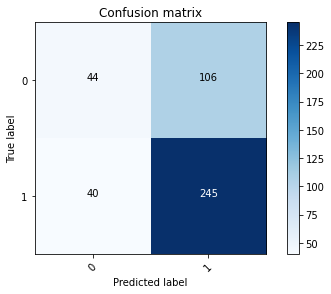

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Boruta_own"] = y_pred
test["Boruta_own"] = y_pred

# BorutaPy Module - Using inbuilt module

In [ ]:
!pip install boruta

     |████████████████████████████████| 61kB 3.7MB/s 


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 20 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), y)
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['fractal_dimension', 'kurtosis', 'secDiffMean', 'secDiffMax', 'skewness', 'first_diff_mean', 'first_diff_max', 'AR1_mean', 'AR1_min', 'AR2_mean', 'AR2_max', 'AR3_mean', 'AR3_min', 'AR3_max', 'hjorth_activity', 'hjorth_mobility', 'hjorth_complexity', 'PMax3', 'PMax4', 'PRatio2', 'PRatio3', 'PRatio4', 'cA_mean_min', 'cA_mean_max', 'cA_std_mean', 'cA_std_min', 'cA_std_max', 'cA_Energy_mean', 'cA_Energy_min', 'cA_Energy_max', 'cD_std_mean', 'cD_std_min', 'cD_std_max', 'cD_Energy_mean', 'cD_Energy_min', 'cD_Energy_max', 'Entropy_D_mean', 'Entropy_D_min', 'Entropy_D_max', 'Entropy_A_mean', 'Entropy_A_min', 'Entropy_A_max']
features in the blue area: ['AR1_max', 'AR2_min', 'PMax1', 'PMax2']


In [ ]:
len(green_area) # got 32 features on 20 iterations, can further select top 5 or 4 on increasing  iterations

42

In [ ]:
len(blue_area)

4

In [ ]:
feat = boruta.support_
feat

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
ind = np.where(feat==1)
ind

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 18, 19,
        22, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51]),)

In [ ]:
ser =  X.columns
features = ser[ind]
features

Index(['fractal_dimension', 'kurtosis', 'secDiffMean', 'secDiffMax',
       'skewness', 'first_diff_mean', 'first_diff_max', 'AR1_mean', 'AR1_min',
       'AR2_mean', 'AR2_max', 'AR3_mean', 'AR3_min', 'AR3_max',
       'hjorth_activity', 'hjorth_mobility', 'hjorth_complexity', 'PMax3',
       'PMax4', 'PRatio2', 'PRatio3', 'PRatio4', 'cA_mean_min', 'cA_mean_max',
       'cA_std_mean', 'cA_std_min', 'cA_std_max', 'cA_Energy_mean',
       'cA_Energy_min', 'cA_Energy_max', 'cD_std_mean', 'cD_std_min',
       'cD_std_max', 'cD_Energy_mean', 'cD_Energy_min', 'cD_Energy_max',
       'Entropy_D_mean', 'Entropy_D_min', 'Entropy_D_max', 'Entropy_A_mean',
       'Entropy_A_min', 'Entropy_A_max'],
      dtype='object')

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR2_mean,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax3,PMax4,PRatio2,PRatio3,PRatio4,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
23730,1.998871,0.042925,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,-0.917613,0.650902,0.763940,-0.400669,-0.478313,-0.315138,82.978812,1.111493,1.284891,9.665791,5.798350,0.000645,0.782619,0.470125,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,51454.932460,6.617211,3.495630,11.981814,9317.567229,2370.571018,27851.611310,44273.306660,7601.084932,157346.918970,127735.426488,50914.143504,3.236804e+05
4169,1.991463,0.176120,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,-1.605150,0.720346,1.093158,-0.359408,-0.450572,-0.237259,140.838040,0.792355,1.628981,15.885015,6.335782,0.000388,3.624442,1.446007,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,237227.085628,5.589116,1.482035,16.641719,8924.606508,426.129755,53728.707203,47122.604795,676.037757,340888.727808,304154.702485,39928.719401,1.862236e+06
14939,1.994898,0.967021,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,-1.267226,0.736065,0.979806,-0.380439,-0.458149,-0.308654,29.088585,0.906706,1.462154,2.252245,2.555051,0.000711,1.776770,2.016361,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,22254.699500,3.084320,1.587472,5.100713,2008.941011,488.893954,5047.526191,6457.114888,778.426300,19795.366774,45738.719305,11296.872697,1.319761e+05
673,1.969051,3.273043,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,-1.492689,0.796607,0.932780,-0.268666,-0.397433,-0.201480,121.583648,0.622912,1.858493,15.118824,3.620572,0.000925,7.551960,1.809427,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,229120.821718,3.358422,1.250864,7.280523,2668.371153,303.552318,10283.167496,10318.965766,351.461008,50548.897163,320341.360849,12766.636392,1.963619e+06
22505,1.986259,5.442509,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,-1.552208,0.753351,1.047320,-0.261682,-0.393123,-0.066927,218.632513,0.590277,2.011368,28.506346,5.301221,0.000430,17.963990,3.341128,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,470456.840401,3.871742,1.463638,8.692638,3558.610390,415.604348,14659.028169,14852.133502,748.643692,75250.752840,677675.444964,30394.441235,4.567866e+06


In [ ]:
boruta.n_features_

42

In [ ]:
rank = boruta.ranking_   # best feature has rank 1
rank

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 3, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
inds = rank.argsort()[0:33]
inds

array([25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 50, 36, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 40, 23, 51,  4,  3,  2, 22, 11,  5, 13, 14, 15])

In [ ]:
ser =  X.columns
features = ser[inds]
features

Index(['PRatio2', 'PRatio3', 'PRatio4', 'cA_mean_min', 'cA_mean_max',
       'cA_std_mean', 'cA_std_min', 'cA_std_max', 'cA_Energy_mean',
       'cA_Energy_min', 'Entropy_A_min', 'cA_Energy_max', 'cD_std_min',
       'cD_std_max', 'cD_Energy_mean', 'cD_Energy_min', 'cD_Energy_max',
       'Entropy_D_mean', 'Entropy_D_min', 'Entropy_D_max', 'Entropy_A_mean',
       'cD_std_mean', 'PMax4', 'Entropy_A_max', 'secDiffMax', 'secDiffMean',
       'kurtosis', 'PMax3', 'AR2_mean', 'skewness', 'AR2_max', 'AR3_mean',
       'AR3_min'],
      dtype='object')

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,PRatio2,PRatio3,PRatio4,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,Entropy_A_min,cA_Energy_max,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,cD_std_mean,PMax4,Entropy_A_max,secDiffMax,secDiffMean,kurtosis,PMax3,AR2_mean,skewness,AR2_max,AR3_mean,AR3_min
23730,0.000645,0.782619,0.470125,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,50914.143504,51454.932460,3.495630,11.981814,9317.567229,2370.571018,27851.611310,44273.306660,7601.084932,157346.918970,127735.426488,6.617211,5.798350,3.236804e+05,22.252859,6.569349,0.042925,9.665791,0.650902,0.021408,0.763940,-0.400669,-0.478313
4169,0.000388,3.624442,1.446007,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,39928.719401,237227.085628,1.482035,16.641719,8924.606508,426.129755,53728.707203,47122.604795,676.037757,340888.727808,304154.702485,5.589116,6.335782,1.862236e+06,20.381493,5.351964,0.176120,15.885015,0.720346,-0.029345,1.093158,-0.359408,-0.450572
14939,0.000711,1.776770,2.016361,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,11296.872697,22254.699500,1.587472,5.100713,2008.941011,488.893954,5047.526191,6457.114888,778.426300,19795.366774,45738.719305,3.084320,2.555051,1.319761e+05,11.543700,3.114868,0.967021,2.252245,0.736065,0.013802,0.979806,-0.380439,-0.458149
673,0.000925,7.551960,1.809427,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,12766.636392,229120.821718,1.250864,7.280523,2668.371153,303.552318,10283.167496,10318.965766,351.461008,50548.897163,320341.360849,3.358422,3.620572,1.963619e+06,14.447429,3.395780,3.273043,15.118824,0.796607,-0.025199,0.932780,-0.268666,-0.397433
22505,0.000430,17.963990,3.341128,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,30394.441235,470456.840401,1.463638,8.692638,3558.610390,415.604348,14659.028169,14852.133502,748.643692,75250.752840,677675.444964,3.871742,5.301221,4.567866e+06,15.220300,4.094312,5.442509,28.506346,0.753351,0.002347,1.047320,-0.261682,-0.393123


(15665, 33) (15665,)
Accuracy 0.6702127659574468
              precision    recall  f1-score   support

         0.0       0.59      0.29      0.39      1871
         1.0       0.69      0.88      0.77      3299

    accuracy                           0.67      5170
   macro avg       0.64      0.59      0.58      5170
weighted avg       0.65      0.67      0.64      5170

ROC_AUC_score : 0.588549


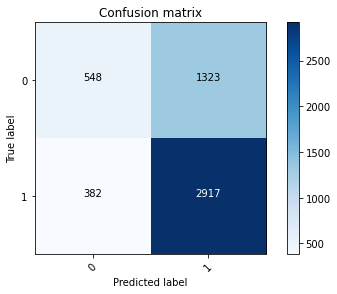

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Boruta"] = y_pred 
test["Boruta"] = y_test
# 42 features - 67.44%
# 35 - 67.4%
# 30 - 66.5%
# 25 - 66.7
# 20 - 66.3

###### You get the same accuracy with 20 feartues to with 25, or 30 or full.

# 2. Lasso Regularisation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'),max_features = 20) 

In [ ]:
sel_.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=20, norm_order=1, prefit=False, threshold=None)

In [ ]:
sel_.get_support()

array([False,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [ ]:
selected_feat = X.columns[(sel_.get_support())]
selected_feat

Index(['fractal_dimension', 'secDiffMean', 'skewness', 'AR1_mean', 'AR1_min',
       'AR1_max', 'AR2_mean', 'AR2_max', 'AR3_mean', 'AR3_min', 'AR3_max',
       'hjorth_complexity', 'PMax1', 'PRatio4', 'cA_mean_min', 'cA_std_mean',
       'cA_std_min', 'cD_std_mean', 'cD_std_min', 'cD_std_max'],
      dtype='object')

In [ ]:
new_X = select_columns(X,selected_feat)
new_X.shape

(5214, 20)

(5214, 20) (5214,)
Accuracy 0.6339337594421848
              precision    recall  f1-score   support

         0.0       0.58      0.24      0.34       673
         1.0       0.65      0.89      0.75      1048

    accuracy                           0.63      1721
   macro avg       0.61      0.56      0.54      1721
weighted avg       0.62      0.63      0.59      1721

ROC_AUC_score : 0.563582


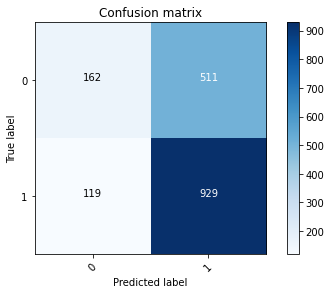

In [ ]:
(y_test,y_pred )= run_model(new_X,y);
predicts["Lasso"] = y_pred
test["Lasso"] = y_test

# 3. Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = RandomForestClassifier()
#model = LogisticRegression()

In [ ]:
selector = RFE(model,n_features_to_select=25, step=1)
selector.fit(X,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=25, step=1, verbose=0)

In [ ]:
selector.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False])

In [ ]:
selector.ranking_

array([ 1,  3,  1,  1,  1,  1,  8, 10, 16,  1,  1,  1,  1,  1,  1,  1,  1,
       25, 22,  1, 15, 20,  4,  1, 11,  1,  2,  1, 27,  1,  1, 19,  1,  1,
       26, 17, 23, 28,  9,  5,  1,  1,  6, 18, 13, 21, 12,  1,  1, 24,  7,
       14])

In [ ]:
selected_feat = X.columns[(selector.get_support())]
selected_feat

Index(['coeff_var', 'kurtosis', 'secDiffMean', 'secDiffMax', 'skewness',
       'AR1_min', 'AR1_max', 'AR2_mean', 'AR2_min', 'AR2_max', 'AR3_mean',
       'AR3_min', 'AR3_max', 'hjorth_complexity', 'PMax4', 'PRatio2',
       'PRatio4', 'cA_mean_min', 'cA_mean_max', 'cA_std_min', 'cA_std_max',
       'cD_std_mean', 'cD_std_min', 'Entropy_D_min', 'Entropy_D_max'],
      dtype='object')

In [ ]:
print(type(selected_feat))
selected_feat.shape


<class 'pandas.core.indexes.base.Index'>


(25,)

In [ ]:
new_X = select_columns(X,selected_feat)
new_X.head()

,coeff_var,kurtosis,secDiffMean,secDiffMax,skewness,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_complexity,PMax4,PRatio2,PRatio4,cA_mean_min,cA_mean_max,cA_std_min,cA_std_max,cD_std_mean,cD_std_min,Entropy_D_min,Entropy_D_max
23730,8.916779e+14,0.042925,6.569349,22.252859,0.021408,-0.917613,-0.471012,0.650902,0.539742,0.763940,-0.400669,-0.478313,-0.315138,1.284891,5.798350,0.000645,0.470125,-0.151130,0.095731,7.394552,16.285863,6.617211,3.495630,7601.084932,157346.918970
4169,-5.458093e+02,0.176120,5.351964,20.381493,-0.029345,-1.605150,-0.844248,0.720346,0.581631,1.093158,-0.359408,-0.450572,-0.237259,1.628981,6.335782,0.000388,1.446007,-0.376694,0.685380,6.700063,34.966969,5.589116,1.482035,676.037757,340888.727808
14939,-5.051062e+01,0.967021,3.114868,11.543700,0.013802,-1.267226,-0.782368,0.736065,0.591442,0.979806,-0.380439,-0.458149,-0.308654,1.462154,2.555051,0.000711,2.016361,-1.532098,1.735110,4.084154,10.710489,3.084320,1.587472,778.426300,19795.366774
673,1.123269e+02,3.273043,3.395780,14.447429,-0.025199,-1.492689,-0.998173,0.796607,0.654795,0.932780,-0.268666,-0.397433,-0.201480,1.858493,3.620572,0.000925,1.809427,-0.535107,0.558118,4.214576,34.365519,3.358422,1.250864,351.461008,50548.897163
22505,-8.427159e+00,5.442509,4.094312,15.220300,0.002347,-1.552208,-1.037854,0.753351,0.535632,1.047320,-0.261682,-0.393123,-0.066927,2.011368,5.301221,0.000430,3.341128,-2.535860,2.742159,5.798657,49.168240,3.871742,1.463638,748.643692,75250.752840


(15665, 25) (15665,)
Accuracy 0.6729206963249517
              precision    recall  f1-score   support

         0.0       0.61      0.27      0.38      1871
         1.0       0.69      0.90      0.78      3299

    accuracy                           0.67      5170
   macro avg       0.65      0.59      0.58      5170
weighted avg       0.66      0.67      0.63      5170

ROC_AUC_score : 0.586391


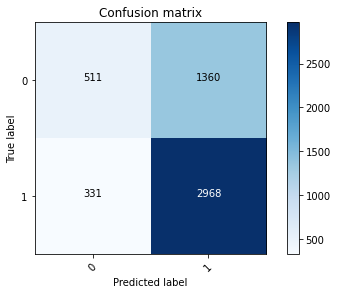

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred  
# 20 featreues - 66.6%
# 25 - 67.29%
# 30 featerus - 67.2%
# 35 features - 66.84%
# 40 - 66.7%

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
estimator = RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=5)
selector.fit(X, y)

RFECV(cv=5,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
features = X.columns[(selector.get_support())]
new_X = select_columns(X,features)
new_X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_complexity,PMax1,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_min,cA_mean_max,cA_std_min,cA_Energy_min,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_min,Entropy_A_max
14329,30.985270,1.992037,3.860808,2.738725,10.801350,-0.014710,3.478435,18.829771,-1.378722,-1.538076,-1.123735,0.849828,0.632811,1.077149,-0.298643,-0.453589,-0.081141,2.017478,0.028029,5.227588,2.048458,0.001582,0.005362,8.649465,3.394700,-0.718293,0.733529,5.048996,4945.687913,-0.018637,0.022621,2.404582,1.453242,3.350887,409.713246,2.178379e+03,3.111692e+03,596.773169,7.039069e+03,20681.354517,1.053182e+06
10444,-109.691611,1.998871,0.122140,37.694975,158.721763,0.008395,45.140257,191.844855,-0.447546,-0.606535,-0.374951,0.566796,0.508382,0.611285,-0.364679,-0.440817,-0.316747,1.186836,0.195201,36.670527,254.127869,0.002383,0.005323,0.322344,2.239177,-2.226935,3.168969,11.260549,24618.645549,-0.338506,0.247352,37.658875,7.261604,91.408778,10229.896609,1.621002e+06,3.005314e+06,47958.596475,1.575881e+07,139578.310658,2.686536e+07
26289,-1768.443003,1.963569,0.247777,1.670656,6.163631,0.032084,2.172457,8.638103,-1.307437,-1.547709,-0.952137,0.929086,0.637182,1.103459,-0.301036,-0.445547,-0.178019,1.481106,0.001550,1.897161,1.218195,0.000935,0.000817,1.361563,0.875097,-0.256237,0.285528,3.072657,1832.285434,-0.011187,0.014512,1.573296,0.888574,2.942522,153.193251,1.679761e+03,9.548041e+02,66.326642,4.656519e+03,5319.501819,4.073929e+04
14120,279.956041,1.967839,1.943817,3.098026,16.726642,0.056684,3.999911,22.925150,-1.271101,-1.437403,-1.010775,0.828852,0.573453,1.049609,-0.299342,-0.411837,-0.179956,1.671937,0.009847,18.423007,6.764938,0.000233,0.000534,6.254280,2.297110,-2.373863,0.479893,3.386039,2224.274659,-0.045187,0.037967,2.976815,0.980799,24.897614,186.622520,1.202593e+05,3.092673e+04,128.510525,8.904606e+05,7230.233889,1.942217e+07
8315,118.784676,1.977444,21.796690,3.587945,9.699815,0.071096,4.495024,77.349940,-1.351525,-1.641197,-1.093619,0.832434,0.671663,0.972599,-0.306024,-0.453187,-0.082596,1.983347,0.279936,3.484088,1.586939,0.044327,0.080347,3.979560,1.892965,-1.018237,2.360202,7.124529,9851.498544,-0.057994,0.126821,5.215957,1.559916,17.579270,472.070321,5.995509e+04,5.349871e+04,1009.730317,4.901802e+05,53128.004867,7.044125e+06


(13061, 41) (13061,)
Accuracy 0.6631871955462769
              precision    recall  f1-score   support

         0.0       0.61      0.25      0.36      1597
         1.0       0.67      0.90      0.77      2714

    accuracy                           0.66      4311
   macro avg       0.64      0.58      0.57      4311
weighted avg       0.65      0.66      0.62      4311

ROC_AUC_score : 0.579029


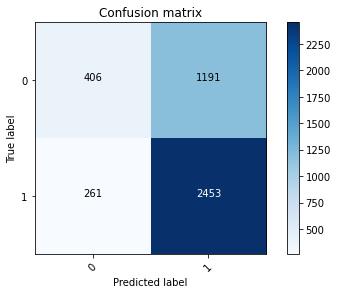

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["RFECV"] = y_test
predicts["RFECV"] = y_pred

# 4. Forward Slection , Backward Selection and Floating Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=10,   # 10 features to select   
           forward=True,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1.fit(np.array(X), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   23.5s finished

[2021-01-18 12:20:07] Features: 1/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished

[2021-01-18 12:20:29] Features: 2/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | 

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [ ]:
type(features)
features = np.array(features)
type(features)
features

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [ ]:
fet = X.columns
features = fet[[0, 1, 2, 3, 4, 5, 6, 7, 8, 17]]

In [ ]:
new_X = sfs1.transform(X)
new_X

array([[-6.45845366e+00,  1.99432746e+00, -2.13653372e-02, ...,
         8.49230765e+01, -5.38444485e-01, -1.10450799e+00],
       [-7.52055890e+00,  1.99603704e+00,  1.47099002e+00, ...,
         2.76231048e+01, -1.18226671e+00, -1.34651888e+00],
       [-7.25321683e+01,  1.99432746e+00,  1.98844368e-01, ...,
         1.66544484e+01, -7.68312830e-01, -1.06276211e+00],
       ...,
       [ 1.59686202e+02,  1.94285006e+00,  4.02077730e+00, ...,
         1.79538103e+02, -7.81684406e-01, -1.29298902e+00],
       [ 1.51382961e+16,  2.00000000e+00,  4.36870437e+00, ...,
         7.52674817e+01, -1.44389456e+00, -1.58132716e+00],
       [-2.39427840e+02,  1.99432746e+00,  8.91213305e-01, ...,
         3.28580198e+01, -7.50333875e-01, -1.29718468e+00]])

In [ ]:
new_X = select_columns(X,features)
new_X

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,hjorth_activity
12797,-6.458454e+00,1.994327,-0.021365,19.389068,71.227618,-0.007279,21.974056,84.923077,-0.538444,596.231893
19608,-7.520559e+00,1.996037,1.470990,5.023667,18.157331,-0.012583,5.957470,27.623105,-1.182267,181.015003
11621,-7.253217e+01,1.994327,0.198844,3.418515,10.681102,0.013028,4.199085,16.654448,-0.768313,28.888882
25007,3.339984e+01,1.993184,2.264931,2.814637,12.961537,-0.017352,4.026586,26.235131,-1.611866,257.614523
11217,4.563580e+00,1.985094,0.725293,3.187608,12.135676,0.004434,3.939581,17.504528,-0.924331,33.394575
...,...,...,...,...,...,...,...,...,...,...
14954,7.017427e+01,1.993184,0.915238,3.028808,13.643292,-0.016005,3.691798,17.440117,-1.188925,31.361175
3427,-5.851448e+01,1.989735,0.792791,7.028606,26.675300,-0.013178,8.717566,35.943514,-1.101187,337.998049
13553,1.596862e+02,1.942850,4.020777,17.877182,109.117674,-0.149127,21.952174,179.538103,-0.781684,7554.623185
19866,1.513830e+16,2.000000,4.368704,7.779609,38.573004,-0.025340,10.906943,75.267482,-1.443895,3155.552025


(1316, 10) (1316,)
Accuracy 0.6620689655172414
              precision    recall  f1-score   support

         0.0       0.51      0.25      0.33       150
         1.0       0.69      0.87      0.77       285

    accuracy                           0.66       435
   macro avg       0.60      0.56      0.55       435
weighted avg       0.63      0.66      0.62       435

ROC_AUC_score : 0.560175


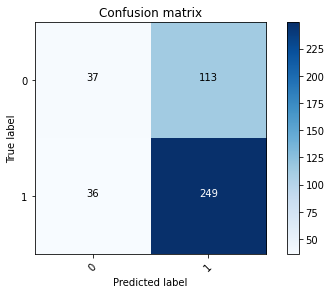

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test

# 5.Feature Importances

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importance = model.feature_importances_
importance

array([0.02216278, 0.02203916, 0.02185416, 0.01917158, 0.02047556,
       0.0246703 , 0.01884302, 0.01971876, 0.01850398, 0.02203572,
       0.02177121, 0.02311567, 0.02255802, 0.02196776, 0.02157541,
       0.02358103, 0.02169242, 0.0159595 , 0.0177096 , 0.01942313,
       0.01938386, 0.01847329, 0.01944779, 0.02191375, 0.0203057 ,
       0.02029506, 0.02060649, 0.02071132, 0.        , 0.0269608 ,
       0.02505354, 0.01641612, 0.01978647, 0.01666533, 0.01501452,
       0.01901732, 0.01657395, 0.        , 0.02086053, 0.02096113,
       0.01880227, 0.02054983, 0.01882025, 0.01842472, 0.01990842,
       0.01884188, 0.01766742, 0.02088412, 0.018615  , 0.01526175,
       0.01907479, 0.01587382])

In [ ]:
important_features_dict = {}

In [ ]:
for x,i in enumerate(importance):
	important_features_dict[x]=i
#important_features_dict

In [ ]:
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
ind = important_features_list[0:30]   # take best 10 features
features = X.columns[ind]

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,cA_mean_min,cA_mean_max,skewness,AR3_min,AR2_mean,AR2_min,coeff_var,fractal_dimension,AR1_min,AR2_max,PMax4,kurtosis,AR1_max,AR3_max,AR3_mean,cD_mean_max,Entropy_D_min,cD_mean_min,PRatio4,PRatio3,cD_std_min,secDiffMax,PRatio1,PRatio2,cD_Energy_min,cA_std_min,first_diff_max,PMax3,hjorth_complexity,PMax1
23730,-0.151130,0.095731,0.021408,-0.478313,0.650902,0.539742,8.916779e+14,1.998871,-0.917613,0.763940,5.798350,0.042925,-0.471012,-0.315138,-0.400669,0.037649,7601.084932,-0.042229,0.470125,0.782619,3.495630,22.252859,0.001373,0.000645,2370.571018,7.394552,30.137667,9.665791,1.284891,0.006233
4169,-0.376694,0.685380,-0.029345,-0.450572,0.720346,0.581631,-5.458093e+02,1.991463,-1.605150,1.093158,6.335782,0.176120,-0.844248,-0.237259,-0.359408,0.072767,676.037757,-0.075211,1.446007,3.624442,1.482035,20.381493,0.000269,0.000388,426.129755,6.700063,26.947750,15.885015,1.628981,0.006167
14939,-1.532098,1.735110,0.013802,-0.458149,0.736065,0.591442,-5.051062e+01,1.994898,-1.267226,0.979806,2.555051,0.967021,-0.782368,-0.308654,-0.380439,0.030007,778.426300,-0.024804,2.016361,1.776770,1.587472,11.543700,0.000353,0.000711,488.893954,4.084154,15.170124,2.252245,1.462154,0.001602
673,-0.535107,0.558118,-0.025199,-0.397433,0.796607,0.654795,1.123269e+02,1.969051,-1.492689,0.932780,3.620572,3.273043,-0.998173,-0.201480,-0.268666,0.020424,351.461008,-0.016143,1.809427,7.551960,1.250864,14.447429,0.000512,0.000925,303.552318,4.214576,27.729265,15.118824,1.858493,0.013990
22505,-2.535860,2.742159,0.002347,-0.393123,0.753351,0.535632,-8.427159e+00,1.986259,-1.552208,1.047320,5.301221,5.442509,-1.037854,-0.066927,-0.261682,0.016734,748.643692,-0.036240,3.341128,17.963990,1.463638,15.220300,0.000129,0.000430,415.604348,5.798657,34.629578,28.506346,2.011368,0.012265


(15665, 30) (15665,)
Accuracy 0.6533849129593811
              precision    recall  f1-score   support

         0.0       0.55      0.24      0.33      1871
         1.0       0.67      0.89      0.77      3299

    accuracy                           0.65      5170
   macro avg       0.61      0.56      0.55      5170
weighted avg       0.63      0.65      0.61      5170

ROC_AUC_score : 0.563796


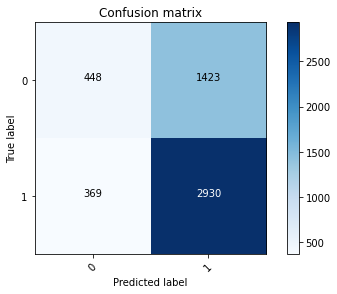

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Feature Importance - Random Forest"] = y_pred 
test["Feature Importance - Random Forest"] = y_test

# 10 - 64.14%
# 20 - 64.7
# 30 - 65.3%

# 6. Genetic Algorithm

In [ ]:
pip install sklearn-genetic


     |████████████████████████████████| 163kB 4.9MB/s 


In [ ]:
from genetic_selection import GeneticSelectionCV

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,               # select only 5 important features
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
selector = selector.fit(X, y)


Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                      
0  	50    	[0.60327106 4.78      ]	[0.034618   3.07434546]	[0.51750202 1.        ]	[ 0.64817663 10.        ]
1  	30    	[-999.43384399    7.68      ]	[3.00018872e+03 2.49351158e+00]	[-1.e+04  1.e+00]      	[ 0.65655317 12.        ]
2  	28    	[-999.42755237    8.46      ]	[3.00019082e+03 2.46746834e+00]	[-1.e+04  1.e+00]      	[ 0.65046088 16.        ]
3  	31    	[-1599.46132043     9.2       ]	[3.66629566e+03 2.14476106e+00]	[-1.e+04  5.e+00]      	[ 0.65199908 17.        ]
4  	22    	[-1199.43206406     8.6       ]	[3.24982509e+03 1.38564065e+00]	[-1.e+04  6.e+00]      	[ 0.65651285 12.        ]
5  	30    	[-599.39280729    8.52      ]  	[2.37502182e+03 1.11785509e+00]	[-1.e+04  6.e+00]      	[ 0.65651285 12.        ]
6  	28    	[-1399.44382809     8.82      ]	[3.47009472e+03 1.36660162e+00]	[-1.e+04  7.e+00]      	[ 0.65651285 12.   

In [ ]:
# the best 5 selected features
selected_feat = X.columns[(selector.get_support())]
selected_feat

Index(['AR3_mean', 'hjorth_activity', 'PMax2', 'cA_std_max', 'cA_Energy_min',
       'cD_mean_max', 'cD_Energy_max', 'Entropy_A_max'],
      dtype='object')

In [ ]:
new_X = select_columns(X,selected_feat)
new_X.head()

,AR3_mean,hjorth_activity,PMax2,cA_std_max,cA_Energy_min,cD_mean_max,cD_Energy_max,Entropy_A_max
12797,-0.394865,596.231893,39.602904,47.594039,3639.122659,0.156149,269410.518967,3.700852e+06
19608,-0.356822,181.015003,48.852907,39.141515,4031.414502,0.079458,31455.821094,2.558442e+06
11621,-0.373410,28.888882,2.876693,14.112964,1938.470911,0.056760,17869.410369,2.344220e+05
25007,-0.173720,257.614523,165.025564,45.429829,7471.515075,0.017964,3898.371235,3.601570e+06
11217,-0.346128,33.394575,3.543950,18.910745,2420.630247,0.033953,22536.512112,4.735331e+05


(1316, 10) (1316,)
Accuracy 0.6620689655172414
              precision    recall  f1-score   support

         0.0       0.48      0.24      0.32       150
         1.0       0.68      0.86      0.76       285

    accuracy                           0.65       435
   macro avg       0.58      0.55      0.54       435
weighted avg       0.61      0.65      0.61       435

ROC_AUC_score : 0.551579


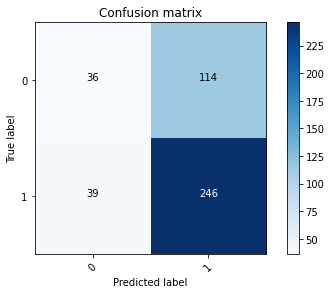

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Genetic Algorithm"] = y_test
predicts["Genetic Algorithm"] = y_pred 

# The aboove accuracy for genetic algorithm is for only 20% data not for 50% , i ran for 50% , it was more than 5 hours but it was still running so i stopped!!

## The accuracy might increase whwn run for more data!!

# ROC-AUC Curves

In [ ]:
for key in test.keys():
  print(key)

Before feature selection


In [ ]:
del test["Boruta_own"]
del predicts["Boruta_own"]

In [ ]:
for key in predicts.keys():
  print(key)

Before feature selection
Correlation
MI
Anova
Chi2
PCA
Feature Importance - Random Forest
Recursive Feature Elimination
Boruta


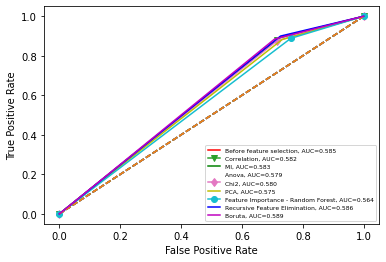

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"Before feature selection": 'r-',
    "Boruta": 'm-',
     #  "Lasso" : 'y-',
      #  "Sequential": 'p-',
        "Feature Importance - Random Forest": 'o-',
        "Recursive Feature Elimination": 'b-',
       # "Genetic Algorithm": 'o-',
       "PCA":"y-",
      #"Autoencoder":"g-",
      #"RFECV":"g-",
      "MI":"g-",
      "Chi2":"d-",
      "Anova":"w-" ,
       "Correlation":"v-",    
        }
for key in test.keys():
    fpr, tpr, thresholds = roc_curve(test[key], predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label = "{}, AUC={:.3f}".format(key, roc_auc_score(test[key],predicts[key])))
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    plt.legend(prop={'size':6}, loc='lower right')
#     pyplot.title(name)

# From the curve RFE outperforms others slightly!!
# RFE and Boruta has a good performance , only difference being RFE shows same accurqcy with 25 features while Boruta shows with 35 features


# 7. PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=35)

In [ ]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 1.53003978e-16 1.43142989e-18 4.73978458e-19
 2.53632730e-21 1.94500816e-21 1.44136800e-22 4.55294118e-23
 2.18508722e-23 1.38246499e-24 2.64792397e-25 3.67079920e-26
 7.92230366e-27 1.52398746e-27 3.99634326e-28 8.72847246e-29
 2.83657912e-29 1.62183736e-29 1.22762992e-29 4.15336610e-30
 2.34963195e-30 3.50716433e-31 1.91704931e-31 1.54035429e-31
 1.36362334e-31 6.51914703e-32 3.16367833e-32 2.60919504e-32
 1.88566529e-32 9.98402083e-33 9.98402083e-33 9.98402083e-33
 9.98402083e-33 9.98402083e-33 9.98402083e-33]


In [ ]:
print(pca.singular_values_)

[7.56440315e+17 9.35677158e+09 9.05023191e+08 5.20779605e+08
 3.80958190e+07 3.33607173e+07 9.08159447e+06 5.10411777e+06
 3.53597393e+06 8.89409445e+05 3.89248925e+05 1.44928895e+05
 6.73287279e+04 2.95301303e+04 1.51218894e+04 7.06714154e+03
 4.02876669e+03 3.04633961e+03 2.65038154e+03 1.54161090e+03
 1.15951023e+03 4.47973913e+02 3.31200747e+02 2.96882760e+02
 2.79332764e+02 1.93139034e+02 1.34546011e+02 1.22187826e+02
 1.03874027e+02 7.55835709e+01 7.55835709e+01 7.55835709e+01
 7.55835709e+01 7.55835709e+01 7.55835709e+01]


In [ ]:
pca.n_features_

52

In [ ]:
new_X = pca.transform(X)
new_X

array([[-8.14442511e+14, -2.97089136e+07,  7.15560669e+05, ...,
        -9.21165386e-03,  7.53574915e-03, -8.34291456e-02],
       [ 7.72353952e+13, -2.82659036e+07,  6.42307129e+05, ...,
         1.08567549e-01,  6.52360634e-02,  2.47063674e-02],
       [ 7.72353952e+13, -3.00353828e+07,  6.21695999e+05, ...,
         1.15491065e-01, -9.74731469e-03, -1.36363984e-01],
       ...,
       [ 7.72353952e+13, -2.05340404e+07,  6.47839163e+05, ...,
        -1.21314492e-01,  5.76106628e-03,  1.29400896e-02],
       [ 7.72353952e+13, -1.08010422e+06,  3.62615766e+06, ...,
         5.89119059e-01,  1.78305097e-01,  9.71708242e-02],
       [ 7.72353952e+13, -2.95423767e+07,  6.24693554e+05, ...,
         1.03760875e-01,  1.31261279e-01,  7.28377180e-02]])

(15665, 35) (15665,)
Accuracy 0.6599613152804642
              precision    recall  f1-score   support

         0.0       0.56      0.27      0.36      1871
         1.0       0.68      0.88      0.77      3299

    accuracy                           0.66      5170
   macro avg       0.62      0.57      0.57      5170
weighted avg       0.64      0.66      0.62      5170

ROC_AUC_score : 0.574964


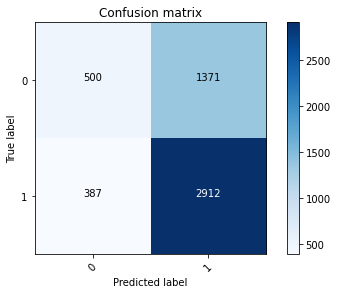

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["PCA"] = y_test
predicts["PCA"] = y_pred 
# 20 featreues - 65.14%
# 30 featerus - 66.6%
# 35 features - 65.9
# 40 - 66.7%

### Even with selecting 20 features it performs bad

# Autoencoders

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
print(X.shape)
X.head()

(5214, 52)


,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
17669,-56.757859,1.987421,1.996264,4.630357,21.837663,-0.002802,5.836621,29.040981,-1.251945,-1.417265,-0.706175,0.817175,0.614123,1.077156,-0.285506,-0.418075,-0.202731,152.491437,0.713752,1.678674,0.110325,34.217917,16.924846,11.166334,0.003224,0.006519,3.064382,2.028275,1.179612e-16,-1.055402,0.954465,14.889008,6.395592,31.430009,5.423791e+04,7936.974081,1.916542e+05,-8.673617e-18,-0.026466,0.029342,4.409679,1.928076,9.313494,4601.247183,721.210274,16827.861630,20074.898102,1474.366068,9.089095e+04,3.938854e+05,34940.984264,1.553759e+06
1079,822.107625,1.903739,3.152873,19.516205,101.752360,-0.026338,25.416193,244.290722,-1.618048,-1.718711,-1.233637,0.953259,0.599288,1.054724,-0.202311,-0.350075,-0.087459,10915.858079,0.450696,2.057048,1.578164,4121.481408,2015.173745,450.327365,0.000383,0.000783,9.152190,2.046007,4.857226e-16,-1.436889,1.067200,123.506203,18.869799,380.672611,4.110689e+06,69078.598063,2.811326e+07,5.065393e-16,-0.079277,0.120353,17.817141,3.760483,56.715864,84739.828745,2743.399169,624040.529508,659350.319287,10345.971180,5.729668e+06,4.915979e+07,484927.687706,3.750416e+08
23298,182.212344,1.992037,0.768730,5.881042,24.112967,-0.013593,6.819345,33.824557,-0.973827,-1.391903,-0.811622,0.708619,0.537204,0.965401,-0.427701,-0.513500,-0.310392,119.687265,0.887092,1.532701,0.012917,17.832093,9.123424,5.528144,0.000724,0.001416,3.225693,1.955955,-7.546047e-17,-0.449485,0.314909,12.068157,5.101603,35.344557,3.593501e+04,5049.230841,2.423521e+05,1.170938e-17,-0.031328,0.024253,6.081271,1.957986,20.968232,10173.797141,743.762692,85295.539137,54095.537826,1537.092613,5.747092e+05,2.407593e+05,21054.303327,1.977029e+06
14471,66.414681,1.997173,4.725316,4.061996,24.629683,0.019504,5.935231,48.304134,-1.626284,-1.812787,-1.136519,0.946970,0.755764,1.176602,-0.228862,-0.393410,-0.125387,1007.242854,0.387484,2.453571,0.134896,681.107527,24.809933,5.534940,0.000198,0.005437,123.055992,27.458455,1.916869e-16,-0.237641,0.280348,37.570159,9.243391,100.694489,3.838134e+05,16576.791834,1.967043e+06,-2.860125e-16,-0.022859,0.034075,3.867176,1.547608,7.380435,3303.251217,464.715055,10567.374689,14001.429414,778.156032,5.864392e+04,3.772491e+06,95661.782207,2.147912e+07
19725,173.725382,1.995468,2.438738,6.146493,32.433233,0.022968,7.497229,37.420173,-1.130204,-1.540525,-0.982377,0.727140,0.659897,0.834676,-0.403812,-0.507864,-0.152648,273.705730,0.699909,1.855595,0.084865,100.916812,32.292922,9.674920,0.000841,0.002628,10.430764,3.127672,-3.469447e-17,-0.879266,0.848595,18.301507,2.928238,47.298252,9.461592e+04,1663.477767,4.341419e+05,1.637145e-17,-0.013849,0.013091,6.251665,1.283575,18.012601,11677.710205,319.629727,62944.067308,65621.614446,409.130361,4.146685e+05,7.606024e+05,4938.583164,3.888470e+06


In [ ]:
# Normalise
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
input_dim = X_scaled.shape[1]
print(X_scaled.shape)
input_dim

(5214, 52)


52

In [ ]:
encoding_dim = 25
# Number of neurons in each Layer [8, 6, 4, 3, ...] of encoders
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(6, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(4, activation="tanh")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="tanh")(encoder_layer_2)

In [ ]:
# Crear encoder model
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)
# Use the model to predict the factors which sum up the information of interest rates.
encoded_data = pd.DataFrame(encoder.predict(X_scaled))
#encoded_data.columns = ['factor_1', 'factor_2', 'factor_3']

In [ ]:
encoded_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.004137,0.082020,-0.276085,0.091380,-0.058507,0.026759,-0.132491,-0.090033,0.004832,0.227571,-0.145248,-0.098543,-0.030145,0.282282,0.081186,0.154707,0.100755,-0.136829,-0.128430,0.073004,-0.315806,0.319599,-0.138196,-0.064651,-0.062479
1,-0.071251,0.048124,-0.298015,0.045941,-0.062376,-0.024478,-0.101029,-0.150676,-0.010781,0.235650,-0.121131,-0.009082,-0.026796,0.197622,0.105415,0.140493,0.179886,-0.162007,-0.188464,-0.005650,-0.283475,0.300809,-0.060930,-0.068678,-0.119882
2,-0.023256,0.122318,-0.271793,0.107989,-0.002049,0.070093,-0.148567,-0.072796,-0.001278,0.218942,-0.142231,-0.099278,-0.054342,0.254615,0.063482,0.175611,0.128271,-0.156158,-0.129856,0.098187,-0.299234,0.298193,-0.153244,-0.075356,-0.089485
3,0.067408,0.001685,-0.221102,0.070903,-0.156548,-0.039843,-0.097246,-0.071632,0.030709,0.196243,-0.127261,-0.127424,0.020609,0.327699,0.092939,0.085371,-0.016972,-0.049710,-0.071309,0.051046,-0.303098,0.313282,-0.124477,-0.036683,0.036266
4,-0.017142,0.093871,-0.265578,0.091594,-0.032081,0.040776,-0.131944,-0.083609,0.000741,0.215835,-0.136717,-0.088451,-0.039177,0.253646,0.072058,0.156876,0.114644,-0.141927,-0.128480,0.075312,-0.294747,0.297236,-0.133722,-0.066924,-0.076013


In [ ]:
new_X = encoded_data
print(new_X.shape)

(5214, 25)


(5214, 25) (5214,)
Accuracy 0.5845438698431145
              precision    recall  f1-score   support

         0.0       0.44      0.23      0.30       673
         1.0       0.62      0.81      0.70      1048

    accuracy                           0.58      1721
   macro avg       0.53      0.52      0.50      1721
weighted avg       0.55      0.58      0.55      1721

ROC_AUC_score : 0.520902


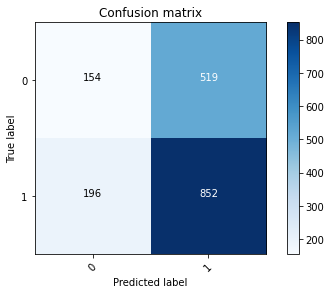

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Autoencoder"] = y_test
predicts["Autoencoder"] = y_pred 

# Correlation





In [ ]:
print(df.shape)
df = df.drop(["arousal",	"dominance",	"liking"],1)
print(df.shape)
df.head()

(15665, 56)
(15665, 53)


,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence
23730,8.916779e+14,1.998871,0.042925,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,-0.917613,-0.471012,0.650902,0.539742,0.763940,-0.400669,-0.478313,-0.315138,82.978812,1.111493,1.284891,0.006233,4.537901,9.665791,5.798350,0.001373,0.000645,0.782619,0.470125,-1.066855e-16,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,51454.932460,3.599551e-17,-0.042229,0.037649,6.617211,3.495630,11.981814,9317.567229,2370.571018,27851.611310,44273.306660,7601.084932,157346.918970,127735.426488,50914.143504,3.236804e+05,1.0
4169,-5.458093e+02,1.991463,0.176120,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,-1.605150,-0.844248,0.720346,0.581631,1.093158,-0.359408,-0.450572,-0.237259,140.838040,0.792355,1.628981,0.006167,22.963672,15.885015,6.335782,0.000269,0.000388,3.624442,1.446007,1.179612e-16,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,237227.085628,1.092876e-16,-0.075211,0.072767,5.589116,1.482035,16.641719,8924.606508,426.129755,53728.707203,47122.604795,676.037757,340888.727808,304154.702485,39928.719401,1.862236e+06,1.0
14939,-5.051062e+01,1.994898,0.967021,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,-1.267226,-0.782368,0.736065,0.591442,0.979806,-0.380439,-0.458149,-0.308654,29.088585,0.906706,1.462154,0.001602,4.539737,2.252245,2.555051,0.000353,0.000711,1.776770,2.016361,1.387779e-17,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,22254.699500,-3.426079e-17,-0.024804,0.030007,3.084320,1.587472,5.100713,2008.941011,488.893954,5047.526191,6457.114888,778.426300,19795.366774,45738.719305,11296.872697,1.319761e+05,1.0
673,1.123269e+02,1.969051,3.273043,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,-1.492689,-0.998173,0.796607,0.654795,0.932780,-0.268666,-0.397433,-0.201480,121.583648,0.622912,1.858493,0.013990,27.342413,15.118824,3.620572,0.000512,0.000925,7.551960,1.809427,-1.647987e-16,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,229120.821718,7.437627e-17,-0.016143,0.020424,3.358422,1.250864,7.280523,2668.371153,303.552318,10283.167496,10318.965766,351.461008,50548.897163,320341.360849,12766.636392,1.963619e+06,1.0
22505,-8.427159e+00,1.986259,5.442509,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,-1.552208,-1.037854,0.753351,0.535632,1.047320,-0.261682,-0.393123,-0.066927,218.632513,0.590277,2.011368,0.012265,95.231072,28.506346,5.301221,0.000129,0.000430,17.963990,3.341128,-5.447032e-16,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,470456.840401,-2.778268e-16,-0.036240,0.016734,3.871742,1.463638,8.692638,3558.610390,415.604348,14659.028169,14852.133502,748.643692,75250.752840,677675.444964,30394.441235,4.567866e+06,0.0


In [ ]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()

<Figure size 864x720 with 0 Axes>

In [ ]:
#Correlation with output variable
cor_target = abs(cor["valence"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.015]
print(relevant_features.shape)
relevant_features

(38,)


secDiffMean          0.045968
secDiffMax           0.040044
skewness             0.029484
first_diff_mean      0.046740
first_diff_max       0.032959
AR1_mean             0.019122
AR1_min              0.018572
AR1_max              0.018228
AR2_mean             0.020328
AR2_min              0.027848
AR2_max              0.029996
AR3_min              0.024409
hjorth_activity      0.022295
hjorth_mobility      0.021533
hjorth_complexity    0.027641
PMax2                0.016756
PMax4                0.029662
PRatio2              0.016604
PRatio3              0.035900
PRatio4              0.039886
cA_mean_min          0.054506
cA_mean_max          0.035875
cA_std_mean          0.031434
cA_std_min           0.023052
cA_std_max           0.020590
cA_Energy_mean       0.018050
cA_Energy_min        0.025628
cD_mean_min          0.022820
cD_mean_max          0.018320
cD_std_mean          0.046231
cD_std_max           0.035293
cD_Energy_mean       0.056275
cD_Energy_max        0.041260
Entropy_D_

In [ ]:
relevant_features.drop("valence",inplace = True)

In [ ]:
features = relevant_features.index
type(features)

pandas.core.indexes.base.Index

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_min,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax2,PMax4,PRatio2,PRatio3,PRatio4,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_max,cD_Energy_mean,cD_Energy_max,Entropy_D_mean,Entropy_D_max,Entropy_A_mean,Entropy_A_min
23730,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,-0.917613,-0.471012,0.650902,0.539742,0.763940,-0.478313,82.978812,1.111493,1.284891,4.537901,5.798350,0.000645,0.782619,0.470125,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,-0.042229,0.037649,6.617211,11.981814,9317.567229,27851.611310,44273.306660,157346.918970,127735.426488,50914.143504
4169,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,-1.605150,-0.844248,0.720346,0.581631,1.093158,-0.450572,140.838040,0.792355,1.628981,22.963672,6.335782,0.000388,3.624442,1.446007,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,-0.075211,0.072767,5.589116,16.641719,8924.606508,53728.707203,47122.604795,340888.727808,304154.702485,39928.719401
14939,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,-1.267226,-0.782368,0.736065,0.591442,0.979806,-0.458149,29.088585,0.906706,1.462154,4.539737,2.555051,0.000711,1.776770,2.016361,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,-0.024804,0.030007,3.084320,5.100713,2008.941011,5047.526191,6457.114888,19795.366774,45738.719305,11296.872697
673,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,-1.492689,-0.998173,0.796607,0.654795,0.932780,-0.397433,121.583648,0.622912,1.858493,27.342413,3.620572,0.000925,7.551960,1.809427,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,-0.016143,0.020424,3.358422,7.280523,2668.371153,10283.167496,10318.965766,50548.897163,320341.360849,12766.636392
22505,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,-1.552208,-1.037854,0.753351,0.535632,1.047320,-0.393123,218.632513,0.590277,2.011368,95.231072,5.301221,0.000430,17.963990,3.341128,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,-0.036240,0.016734,3.871742,8.692638,3558.610390,14659.028169,14852.133502,75250.752840,677675.444964,30394.441235


(15665, 37) (15665,)
Accuracy 0.6646034816247582
              precision    recall  f1-score   support

         0.0       0.57      0.28      0.38      1871
         1.0       0.68      0.88      0.77      3299

    accuracy                           0.66      5170
   macro avg       0.63      0.58      0.57      5170
weighted avg       0.64      0.66      0.63      5170

ROC_AUC_score : 0.582188


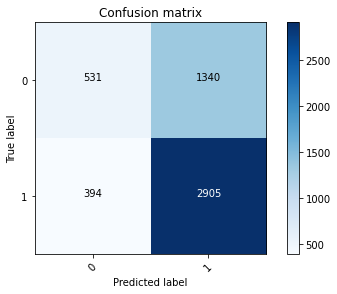

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Correlation"] = y_test
predicts["Correlation"] = y_pred 
# 15 featuers - 64%
# 29 features - 66.6%
# 37 features - 66.5%

# Mutual Information

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=35)
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_fs = fs.transform(X)

In [ ]:
features = X.columns[(fs.get_support())]
features

Index(['fractal_dimension', 'secDiffMean', 'secDiffMax', 'first_diff_mean',
       'AR1_mean', 'AR1_min', 'AR2_mean', 'AR2_min', 'AR2_max', 'AR3_mean',
       'AR3_min', 'hjorth_activity', 'hjorth_mobility', 'PMax1', 'PMax3',
       'PMax4', 'PRatio3', 'PRatio4', 'cA_mean_min', 'cA_mean_max',
       'cA_std_mean', 'cA_std_max', 'cA_Energy_mean', 'cA_Energy_max',
       'cD_mean_mean', 'cD_mean_max', 'cD_std_mean', 'cD_std_min',
       'cD_std_max', 'cD_Energy_mean', 'cD_Energy_min', 'cD_Energy_max',
       'Entropy_D_mean', 'Entropy_A_min', 'Entropy_A_max'],
      dtype='object')

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,fractal_dimension,secDiffMean,secDiffMax,first_diff_mean,AR1_mean,AR1_min,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,hjorth_activity,hjorth_mobility,PMax1,PMax3,PMax4,PRatio3,PRatio4,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_max,cA_Energy_mean,cA_Energy_max,cD_mean_mean,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_A_min,Entropy_A_max
23730,1.998871,6.569349,22.252859,8.009900,-0.716353,-0.917613,0.650902,0.539742,0.763940,-0.400669,-0.478313,82.978812,1.111493,0.006233,9.665791,5.798350,0.782619,0.470125,-0.151130,0.095731,10.574401,16.285863,22767.370496,51454.932460,3.599551e-17,0.037649,6.617211,3.495630,11.981814,9317.567229,2370.571018,27851.611310,44273.306660,50914.143504,3.236804e+05
4169,1.991463,5.351964,20.381493,6.905878,-1.086867,-1.605150,0.720346,0.581631,1.093158,-0.359408,-0.450572,140.838040,0.792355,0.006167,15.885015,6.335782,3.624442,1.446007,-0.376694,0.685380,13.560653,34.966969,45572.048675,237227.085628,1.092876e-16,0.072767,5.589116,1.482035,16.641719,8924.606508,426.129755,53728.707203,47122.604795,39928.719401,1.862236e+06
14939,1.994898,3.114868,11.543700,3.756798,-0.996376,-1.267226,0.736065,0.591442,0.979806,-0.380439,-0.458149,29.088585,0.906706,0.001602,2.252245,2.555051,1.776770,2.016361,-1.532098,1.735110,6.688997,10.710489,9322.416360,22254.699500,-3.426079e-17,0.030007,3.084320,1.587472,5.100713,2008.941011,488.893954,5047.526191,6457.114888,11296.872697,1.319761e+05
673,1.969051,3.395780,14.447429,4.344316,-1.318556,-1.492689,0.796607,0.654795,0.932780,-0.268666,-0.397433,121.583648,0.622912,0.013990,15.118824,3.620572,7.551960,1.809427,-0.535107,0.558118,13.323822,34.365519,44175.038527,229120.821718,7.437627e-17,0.020424,3.358422,1.250864,7.280523,2668.371153,303.552318,10283.167496,10318.965766,12766.636392,1.963619e+06
22505,1.986259,4.094312,15.220300,5.176704,-1.306099,-1.552208,0.753351,0.535632,1.047320,-0.261682,-0.393123,218.632513,0.590277,0.012265,28.506346,5.301221,17.963990,3.341128,-2.535860,2.742159,17.359237,49.168240,81171.760960,470456.840401,-2.778268e-16,0.016734,3.871742,1.463638,8.692638,3558.610390,415.604348,14659.028169,14852.133502,30394.441235,4.567866e+06


(15665, 35) (15665,)
Accuracy 0.6647969052224372
              precision    recall  f1-score   support

         0.0       0.57      0.29      0.38      1871
         1.0       0.69      0.88      0.77      3299

    accuracy                           0.66      5170
   macro avg       0.63      0.58      0.58      5170
weighted avg       0.64      0.66      0.63      5170

ROC_AUC_score : 0.583496


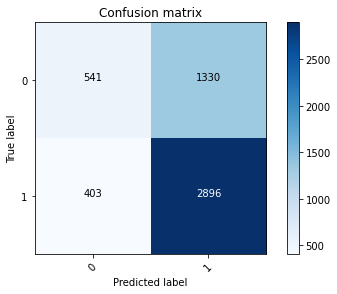

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["MI"] = y_test
predicts["MI"] = y_pred 
# 20 featreues - 65.9%
# 30 featerus - 66.8%
# 35 features - 67.17%
# 40 - 66.7%

# Anova test

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
fs = SelectKBest(score_func=f_classif, k=40)

In [ ]:
# learn relationship from training data
fs.fit(X, y)

SelectKBest(k=40, score_func=<function f_classif at 0x7fd118f3b2f0>)

In [ ]:
features = X.columns[(fs.get_support())]
features

Index(['kurtosis', 'secDiffMean', 'secDiffMax', 'skewness', 'first_diff_mean',
       'first_diff_max', 'AR1_mean', 'AR1_min', 'AR1_max', 'AR2_mean',
       'AR2_min', 'AR2_max', 'AR3_min', 'hjorth_activity', 'hjorth_mobility',
       'hjorth_complexity', 'PMax2', 'PMax3', 'PMax4', 'PRatio2', 'PRatio3',
       'PRatio4', 'cA_mean_mean', 'cA_mean_min', 'cA_mean_max', 'cA_std_mean',
       'cA_std_min', 'cA_std_max', 'cA_Energy_mean', 'cA_Energy_min',
       'cD_mean_min', 'cD_mean_max', 'cD_std_mean', 'cD_std_max',
       'cD_Energy_mean', 'cD_Energy_max', 'Entropy_D_mean', 'Entropy_D_max',
       'Entropy_A_mean', 'Entropy_A_min'],
      dtype='object')

In [ ]:
new_X = select_columns(X,features)
new_X.head()

,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_min,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax2,PMax3,PMax4,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_max,cD_Energy_mean,cD_Energy_max,Entropy_D_mean,Entropy_D_max,Entropy_A_mean,Entropy_A_min
23730,0.042925,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,-0.917613,-0.471012,0.650902,0.539742,0.763940,-0.478313,82.978812,1.111493,1.284891,4.537901,9.665791,5.798350,0.000645,0.782619,0.470125,-1.066855e-16,-0.151130,0.095731,10.574401,7.394552,16.285863,22767.370496,10608.168942,-0.042229,0.037649,6.617211,11.981814,9317.567229,27851.611310,44273.306660,157346.918970,127735.426488,50914.143504
4169,0.176120,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,-1.605150,-0.844248,0.720346,0.581631,1.093158,-0.450572,140.838040,0.792355,1.628981,22.963672,15.885015,6.335782,0.000388,3.624442,1.446007,1.179612e-16,-0.376694,0.685380,13.560653,6.700063,34.966969,45572.048675,8709.673337,-0.075211,0.072767,5.589116,16.641719,8924.606508,53728.707203,47122.604795,340888.727808,304154.702485,39928.719401
14939,0.967021,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,-1.267226,-0.782368,0.736065,0.591442,0.979806,-0.458149,29.088585,0.906706,1.462154,4.539737,2.252245,2.555051,0.000711,1.776770,2.016361,1.387779e-17,-1.532098,1.735110,6.688997,4.084154,10.710489,9322.416360,3254.531395,-0.024804,0.030007,3.084320,5.100713,2008.941011,5047.526191,6457.114888,19795.366774,45738.719305,11296.872697
673,3.273043,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,-1.492689,-0.998173,0.796607,0.654795,0.932780,-0.397433,121.583648,0.622912,1.858493,27.342413,15.118824,3.620572,0.000925,7.551960,1.809427,-1.647987e-16,-0.535107,0.558118,13.323822,4.214576,34.365519,44175.038527,3445.963340,-0.016143,0.020424,3.358422,7.280523,2668.371153,10283.167496,10318.965766,50548.897163,320341.360849,12766.636392
22505,5.442509,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,-1.552208,-1.037854,0.753351,0.535632,1.047320,-0.393123,218.632513,0.590277,2.011368,95.231072,28.506346,5.301221,0.000430,17.963990,3.341128,-5.447032e-16,-2.535860,2.742159,17.359237,5.798657,49.168240,81171.760960,6537.856616,-0.036240,0.016734,3.871742,8.692638,3558.610390,14659.028169,14852.133502,75250.752840,677675.444964,30394.441235


(15665, 40) (15665,)
Accuracy 0.6630560928433269
              precision    recall  f1-score   support

         0.0       0.57      0.27      0.37      1871
         1.0       0.68      0.88      0.77      3299

    accuracy                           0.66      5170
   macro avg       0.63      0.58      0.57      5170
weighted avg       0.64      0.66      0.63      5170

ROC_AUC_score : 0.578893


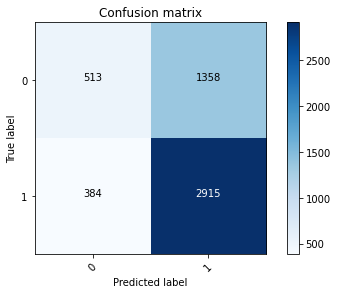

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Anova"] = y_test
predicts["Anova"] = y_pred   # 20 features - 64.5% , 10 featues - 62.5%
# 20 featreues - 66.4%
# 30 featerus - 66.8%
# 35 features - 66.4%
# 40 - 66.4%

# Chi squared test

In [ ]:
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=f_classif, k=30)
fs.fit(X, y)
features = X.columns[(fs.get_support())]
new_X = select_columns(X,features)
new_X.head()

,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR2_mean,AR2_min,AR2_max,AR3_min,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax4,PRatio3,PRatio4,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_min,cD_mean_min,cD_std_mean,cD_std_max,cD_Energy_mean,cD_Energy_max,Entropy_D_mean,Entropy_D_max,Entropy_A_min
23730,6.569349,22.252859,0.021408,8.009900,30.137667,-0.716353,0.650902,0.539742,0.763940,-0.478313,82.978812,1.111493,1.284891,5.798350,0.782619,0.470125,-0.151130,0.095731,10.574401,7.394552,16.285863,10608.168942,-0.042229,6.617211,11.981814,9317.567229,27851.611310,44273.306660,157346.918970,50914.143504
4169,5.351964,20.381493,-0.029345,6.905878,26.947750,-1.086867,0.720346,0.581631,1.093158,-0.450572,140.838040,0.792355,1.628981,6.335782,3.624442,1.446007,-0.376694,0.685380,13.560653,6.700063,34.966969,8709.673337,-0.075211,5.589116,16.641719,8924.606508,53728.707203,47122.604795,340888.727808,39928.719401
14939,3.114868,11.543700,0.013802,3.756798,15.170124,-0.996376,0.736065,0.591442,0.979806,-0.458149,29.088585,0.906706,1.462154,2.555051,1.776770,2.016361,-1.532098,1.735110,6.688997,4.084154,10.710489,3254.531395,-0.024804,3.084320,5.100713,2008.941011,5047.526191,6457.114888,19795.366774,11296.872697
673,3.395780,14.447429,-0.025199,4.344316,27.729265,-1.318556,0.796607,0.654795,0.932780,-0.397433,121.583648,0.622912,1.858493,3.620572,7.551960,1.809427,-0.535107,0.558118,13.323822,4.214576,34.365519,3445.963340,-0.016143,3.358422,7.280523,2668.371153,10283.167496,10318.965766,50548.897163,12766.636392
22505,4.094312,15.220300,0.002347,5.176704,34.629578,-1.306099,0.753351,0.535632,1.047320,-0.393123,218.632513,0.590277,2.011368,5.301221,17.963990,3.341128,-2.535860,2.742159,17.359237,5.798657,49.168240,6537.856616,-0.036240,3.871742,8.692638,3558.610390,14659.028169,14852.133502,75250.752840,30394.441235


(15665, 30) (15665,)
Accuracy 0.6617021276595745
              precision    recall  f1-score   support

         0.0       0.56      0.29      0.38      1871
         1.0       0.68      0.88      0.77      3299

    accuracy                           0.66      5170
   macro avg       0.62      0.58      0.57      5170
weighted avg       0.64      0.66      0.63      5170

ROC_AUC_score : 0.580261


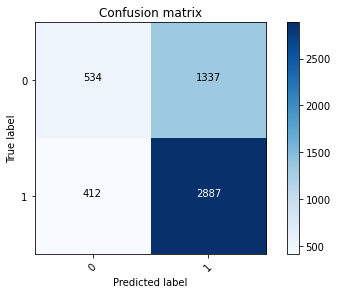

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Chi2"] = y_test
predicts["Chi2"] = y_pred
# 20 featreues - 66.2%
# 30 featerus - 66.0%
# 35 features - 66.8%
# 40 - 66.3%